In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

In [9]:
# population = pd.read_excel('data/Report_seoul_population_2018_3Q.xls', 
#                      header=2,
#                      parse_cols="B, C, D, M, N"
#                     )
# population.head()
population = pd.read_csv('data/seoul_population_cctv.csv', encoding='euc-kr')
population.head()

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
0,강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,1564.173631
1,양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,893.971889
2,강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,823.205365
3,용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432,751.225257
4,서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,739.701750


In [12]:
plt.rcParams["figure.figsize"] = [12,6]

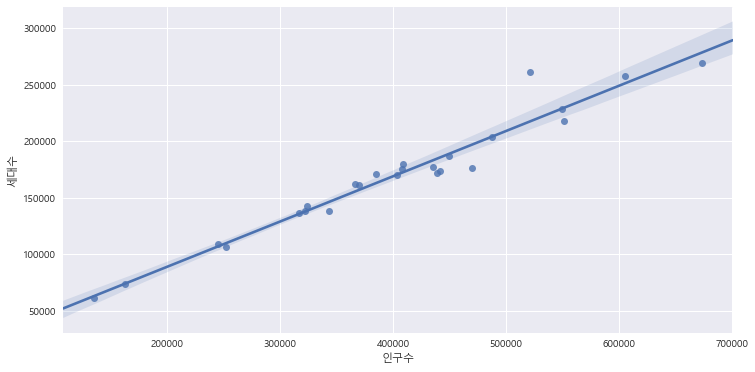

In [13]:
sns.regplot(x="인구수", y="세대수", data=population);


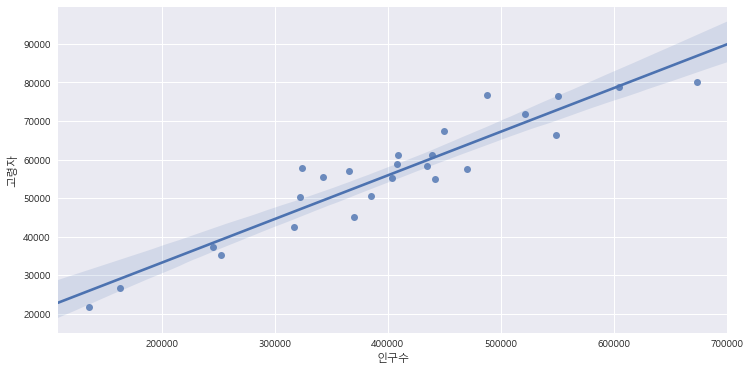

In [14]:
sns.regplot(x="인구수", y="고령자", data=population);


#참조. https://github.com/southkorea/southkorea-maps/tree/master/kostat/2013/json

In [15]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [17]:
geo_path = 'data/skorea_municipalities_geo_simple.json'

geo_str = json.load(open(geo_path, encoding='utf-8'))
# geo_str

In [18]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['인구수']})
guDat.head()

,gu,counts
0,강남구,549255
1,양천구,469945
2,강서구,605068
3,용산구,245087
4,서초구,441539


In [19]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map

In [21]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [23]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['고령자']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [24]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['고령자비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

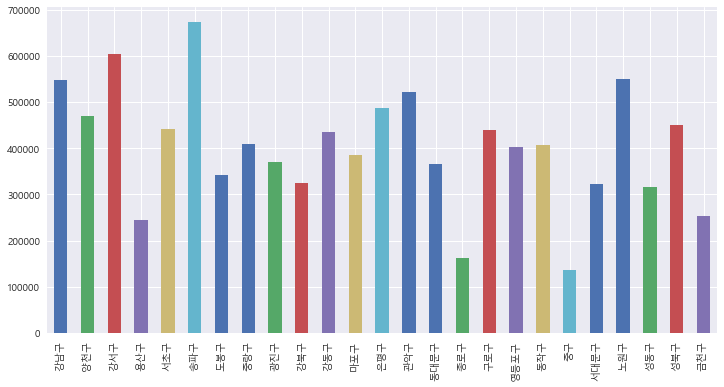

In [25]:
plt.rcParams["figure.figsize"] = [12,6]
df_population = pd.Series(population['인구수'].values, index=population['구'].values)
df_population.plot(kind='bar')

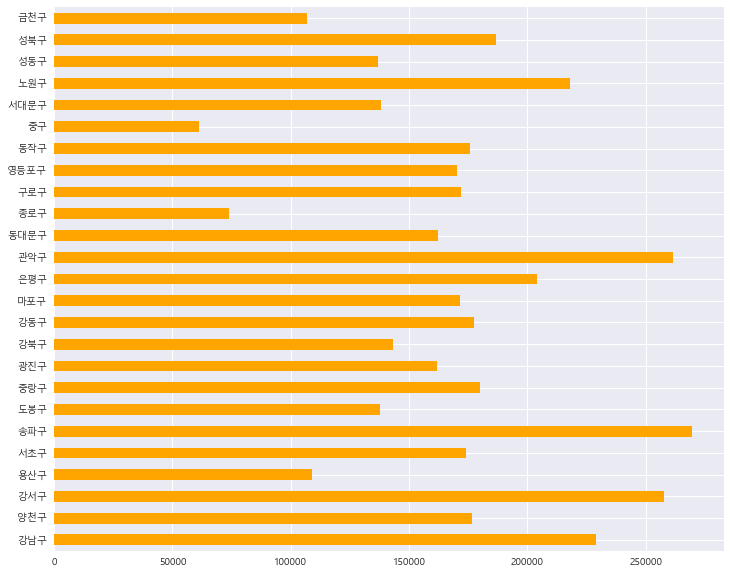

In [26]:
plt.rcParams["figure.figsize"] = [12,10]
df_population = pd.Series(population['세대수'].values, index=population['구'].values)
df_population.plot(kind='barh', color='orange')

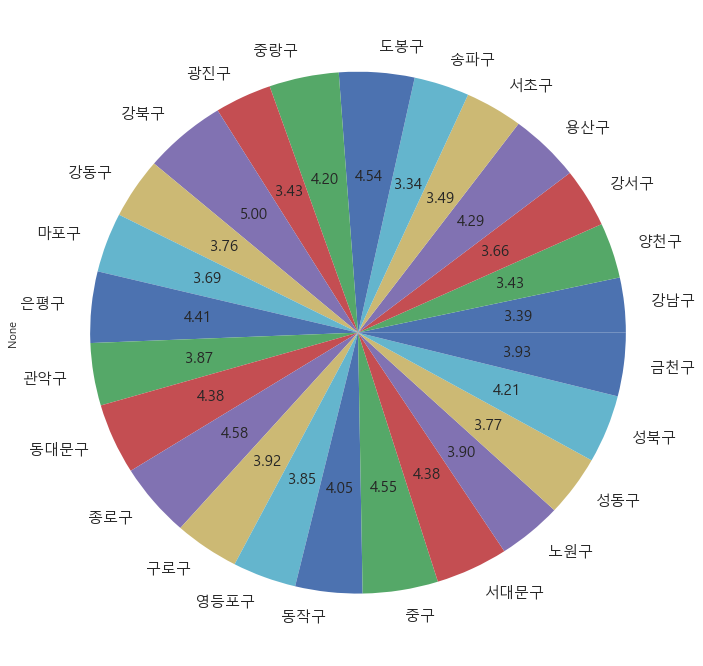

In [27]:
plt.rcParams["figure.figsize"] = [12,12]
df_population = pd.Series(population['고령자비율'].values, index=population['구'].values)
df_population.plot(kind='pie', autopct='%.2f', fontsize=15);